# Vanishing and Exploding Gradients

## Exploding Gradients

In [1]:
from mxnet import nd

M = nd.random.normal(shape=(4, 4))
print('A single Matrix', M)
for i in range(100):
    M = nd.dot(M, nd.random.normal(shape=(4, 4)))
    
print('After multiplying 100 matrices', M)

A single Matrix 
[[ 1.1630785   0.4838046   0.29956347  0.15302546]
 [-1.1688148   1.558071   -0.5459446  -2.3556297 ]
 [ 0.54144025  2.6785064   1.2546344  -0.54877406]
 [-0.68106437 -0.1353156   0.37723133  0.41016456]]
<NDArray 4x4 @cpu(0)>
After multiplying 100 matrices 
[[-4.3623116e+23  2.7321869e+23  2.7285193e+22  1.4412908e+23]
 [-2.6033628e+24  1.6305285e+24  1.6283406e+23  8.6014091e+23]
 [-2.0975532e+24  1.3137320e+24  1.3119681e+23  6.9302349e+23]
 [ 6.1649062e+23 -3.8611817e+23 -3.8559969e+22 -2.0368610e+23]]
<NDArray 4x4 @cpu(0)>


## Vanishing Gradients

The gradient of sigmoid vanishes for very large or very small arguments. Due to the chain rule, this means that unless we are in the range between the Goldilocks zone, the gradients of the overall product may vanish. When we have many layers this is likely to happen for *some* layers.

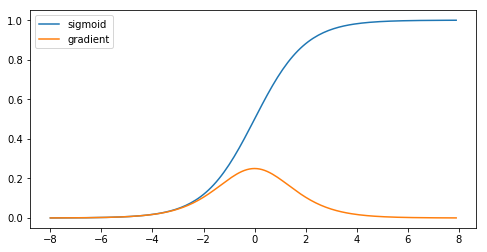

In [5]:
from mxnet import autograd
import matplotlib.pyplot as plt

x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.sigmoid()
y.backward()

plt.figure(figsize=(8, 4))
plt.plot(x.asnumpy(), y.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()

## Symmetry

Neural network layers has pernutation symmetry between the hidden units. If we initialize all weights in a layer with the same value, the hidden layer behaves as if it only a single unit.

# Parameter Initialization

## Default Initialization 

MXNet default random initialization method is that each element of the weight parameter is randomly sampled with an uniform distribution $U[-0.07, 0.07]$ and the bias parameters are all set to $0$.

## Xavier Initialization

For Gaussian random variables the Xavier initialization picks a normal distribution with zero mean and variance $\sigma^2 = 2 / (n_\mathrm{in} + n_\mathrm{out})$. For uniformly distributed random variables $U[-a, a]$, we should initialize uniformly with $U\left[-\sqrt{6/(n_\mathrm{in} + n_\mathrm{out})}, \sqrt{6/(n_\mathrm{in} + n_\mathrm{out})}\right]$

# Problems

1. Can you design other cases of symmetry breaking besides the permutation symmetry?

2. Can we initialize all weight parameters in linear regression or in softmax regression to the same value?

3. Look up analytic bounds on the eigenvalues of the product of two matrices. What does this tell you about ensuring that gradients are well conditioned?

4. If we know that some terms diverge, can we fix this after the fact? Look at the paper on LARS by [You, Gitman and Ginsburg, 2017](https://arxiv.org/pdf/1708.03888.pdf) for inspiration.